In [ ]:
#Refernce to these code is: https://github.com/deep-learning-with-pytorch/dlwpt-code

In [1]:
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from collections import OrderedDict

<h2>Chapter 6: Using a neural network to fit the data:</h2>
    <ul>
        <li> They key difference bwteen linear models and non linear models are non linear activation functions </li>
        <li> Working with PyTorch’s nn module </li>
        <li> Solving a linear-fit problem with a neural networkWorking with PyTorch’s nn module </li>
    </ul>

<h2>Overview:</h2>
<ul>
    <li> This chapter starts with explanation about <b> Artificial Neuron Networks </b>. </li>
    <li> An important difference between linear model and deep learning model is the shape of the error function. linear model has a convex error curve with a singular, clearly defined minimum. </li>
    <li> Neural networks do not have the same property of a convex error surface, even when using the same error-squared loss function! There’s no single right answer for each parameter we are attempting to approximate.</li>
    <li> Learning for neural network means specializing a <span style='background-color:#FFFF00;'>  generic model </span> to a task using examples, because the model wasn’t built with that specific task in mind describing how that task worked were encoded in the model. </li>
</ul>

<h3>Dataset:</h3>
<ul>
    <li> We use previous chapters dataset. 11 datapoints are gathered by making note of temperature data in old celcius (t_c). 
    And measurement from new thermometer (t_u) </li>
    <li><span style="color:Tomato;"><b>Note:</b></span> Simple sequential neural network model is compared with simple linear model here.</li>
</ul>
    

<h3> Activation Function is the difference between linear and NN model. Why is that the case? </h3>
<ul> We need activation function for two reasons, more explained in this <a href='https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning'> link </a>:
<li>In the inner parts of the model, it allows the output function to have different
    slopes at different values. something a linear function by definition cannot do. </li>
<li> At the last layer of the network, it has the role of concentrating the outputs of
    the preceding linear operation into a given range.</li>
</ul>  
Common activation functions are (Tanh, Softplus, Hardtanh, Sigmoid, ReLU, LeakyReLU)

<h2> Lets get data from previous chapter </h2>

We get temperature data in good old Celsius and measurements from our new thermometer, and create models.

In [2]:
# t_c are values in celsius
# t_u are values in unknown unit

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


# We reshape our B inputs to B × Nin, where Nin is 1. That is easily done with unsqueeze:
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

# define indices to divide train and val set
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

#normalized unknown values of train and validation
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


<span style='background-color:#FFFF00;'> A PyTorch has a module dedicated for NN called torch.nn </span> . It is a Python class deriving from the nn.Module base class.'A PyTorch has a module dedicated for NN
called torch.nn. It is a Python class deriving from the nn.Module base class. Any module in nn is written to produce outputs for a batch of multiple inputs at the
same time. Assuming we need to run nn.Linear on 10 samples, we can create an
input tensor of size B × Nin, where B is the size of the batch and Nin is the number of
input features as follow:

In [3]:
linear_model = nn.Linear(1, 1)

print(linear_model(t_un_val))

print("linear model weight are\n", linear_model.weight)
print("----------")
print("linear model bias are\n ", linear_model.bias)

tensor([[-0.8193],
        [-0.9060]], grad_fn=<AddmmBackward0>)
linear model weight are
 Parameter containing:
tensor([[-0.0444]], requires_grad=True)
----------
linear model bias are
  Parameter containing:
tensor([-0.6021], requires_grad=True)


In [34]:
#model on batch of input
x = torch.ones(10, 1)
linear_model (x)


tensor([[-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701]], grad_fn=<AddmmBackward0>)

This call recurses into submodules defined in the module’s init constructor and
returns a flat list of all parameters encountered, so that we can conveniently pass it to
the optimizer constructor as we did previously. Optimizer replaces params.

In [5]:
print("list of parameters: \n", list(linear_model.parameters()))
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)

list of parameters: 
 [Parameter containing:
tensor([[-0.0444]], requires_grad=True), Parameter containing:
tensor([-0.6021], requires_grad=True)]


In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")

In [12]:
training_loop( 
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val )

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 190.7808, Validation loss 278.8260
Epoch 1000, Training loss 190.7808, Validation loss 278.8260
Epoch 2000, Training loss 190.7808, Validation loss 278.8260
Epoch 3000, Training loss 190.7808, Validation loss 278.8260

Parameter containing:
tensor([[-0.0444]], requires_grad=True)
Parameter containing:
tensor([-0.6021], requires_grad=True)


<h3> A neural network that replaces linear model is called sequential neural network model</h3>
The first linear + activation layer is commonly referred to as a hidden layer for historical reasons, since its outputs
are not observed directly but fed into the output layer. The last linear layer will
take the output of activations and combine them linearly to produce the output value. 
As you can see here we have linear models. the only difference is that <span style='background-color:#FFFF00;'> activation function </span> is added in between.


In [13]:
seq_model = nn.Sequential( 
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
    ]))

for name, param in seq_model.named_parameters():
    print(name, param.shape)

print()
print("bias of seq model", seq_model.output_linear.bias)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])

bias of seq model Parameter containing:
tensor([0.1235], requires_grad=True)


In [14]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output: ', seq_model(t_un_val))
print('answer: ', t_c_val)
print('hidden: ', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 175.5862, Validation loss 256.2816
Epoch 1000, Training loss 6.3812, Validation loss 3.2469
Epoch 2000, Training loss 4.7872, Validation loss 0.9755
Epoch 3000, Training loss 2.9010, Validation loss 0.1729
Epoch 4000, Training loss 2.3295, Validation loss 0.0184
Epoch 5000, Training loss 2.2161, Validation loss 0.0552
output:  tensor([[ 7.4488],
        [20.4543]], grad_fn=<AddmmBackward0>)
answer:  tensor([[ 8.],
        [21.]])
hidden:  tensor([[ 0.0136],
        [-4.4672],
        [ 0.0111],
        [-0.2378],
        [-3.5705],
        [ 0.1985],
        [ 4.5836],
        [ 4.1576]])


## Comparing sequential NN model to Linear NN model ## 

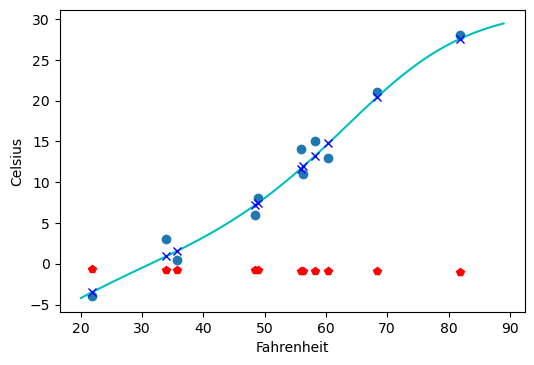

In [15]:

#detach and numpy are needed to extract output in list of float format 

t_range=torch.arange(20.,90.).unsqueeze(1)
fig=plt.figure(dpi=100)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seq_model(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),linear_model(0.1*t_u).detach().numpy(),'rp')
plt.plot(t_u.numpy(),seq_model(0.1*t_u).detach().numpy(),'bx')

In [ ]:
The input data are circles. The continuous line shows behavior of samples.
Neural network models outpus are Xs.
Linear models output are reds.

<h2> Review of chapter 6: </h2>
<ul>
<li>The chapter starts by introducing the concept of overfitting and underfitting. It explains how overfitting occurs when a model is too complex and captures noise in the data, while underfitting occurs when a model is too simple and cannot capture the underlying patterns in the data.</li>

<li>The chapter then moves on to explain how to design a neural network architecture using PyTorch. It covers how to define the architecture of a neural network by creating a subclass of the nn.Module class in PyTorch. The author explains how to define the layers of the neural network and how to pass data through the network.</li>

<li>Next, the chapter explains how to train a neural network using PyTorch. It covers the use of loss functions, optimizers, and the process of backpropagation. The author also provides practical tips for hyperparameter tuning and preventing overfitting, such as regularization techniques.</li>

<li>The chapter also covers the importance of evaluating a models performance using validation and test datasets. The author explains how to use the evaluation metrics to measure the accuracy of a model and how to interpret the results.</li>

<li> Finally, the chapter provides an example of using a neural network to fit a dataset of images. The author walks through the steps of defining the architecture, training the model, and evaluating its performance.</li>
</ul> 
Overall, this chapter provides a comprehensive guide to using PyTorch to design and train neural networks to fit data, including techniques for preventing overfitting and evaluating model performance.